In [2]:
import pandas as pd


In [3]:
conda install matplotlib

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\shlbs\miniconda3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.08.22 |       haa95532_0         123 KB
    certifi-2023.7.22          |  py310haa95532_0         154 KB
    contourpy-1.0.5            |  py310h59b6b97_0         159 KB
    intel-openmp-2023.1.0      |   h59b6b97_46319         2.7 MB
    kiwisolver-1.4.4           |  py310hd77b12b_0          60 KB
    matplotlib-3.7.2           |  py310haa95532_0           9 KB
    matplotlib-base-3.7.2      |  py310h4ed8f06_0         6.6 MB
    mkl-2023.1.0               |   h6b88ed4_46357       155.6 MB
    mkl-service-2.4.0          |  py310h2bbff1b_1          44 KB
    mkl_fft-1.3.8              |  py310h2bbff1b_0         170 KB
    mkl_ran



==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0




In [4]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r'C:\Users\shlbs\OneDrive - The University of Texas at Austin\Desktop\Cornudas_Processed_FieldSpec\CND001\CND001_Processed.csv', header = None)


In [19]:
df.head()

0  1    2      3
0  CND00100000.asd  1  350  0.565
1  CND00100000.asd  2  351  0.565
2  CND00100000.asd  3  352  0.561
3  CND00100000.asd  4  353  0.562
4  CND00100000.asd  5  354  0.565

In [20]:
unique_values = df.iloc[:, 0].unique()

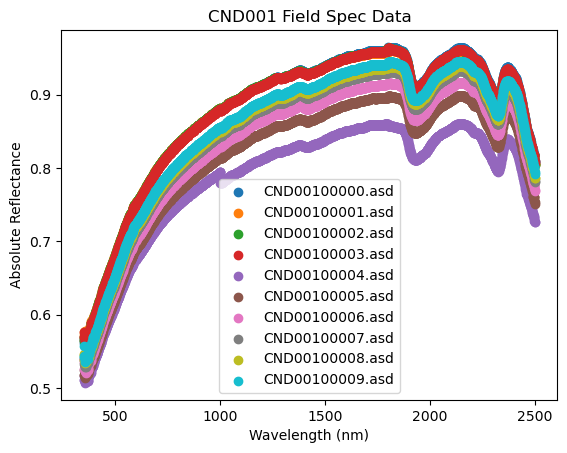

In [24]:
fig, ax = plt.subplots()
for value in unique_values:
    subset = df[df.iloc[:, 0] == value]
    ax.scatter(subset.iloc[:, 2], subset.iloc[:, 3], label=str(value))

# Add labels and title
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absolute Reflectance')
ax.set_title('CND001 Field Spec Data')

# Add legend
ax.legend()

# Show the plot
plt.show()

C:\Users\shlbs\AppData\Local\Temp\ipykernel_25224\3374693181.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', num_colors)


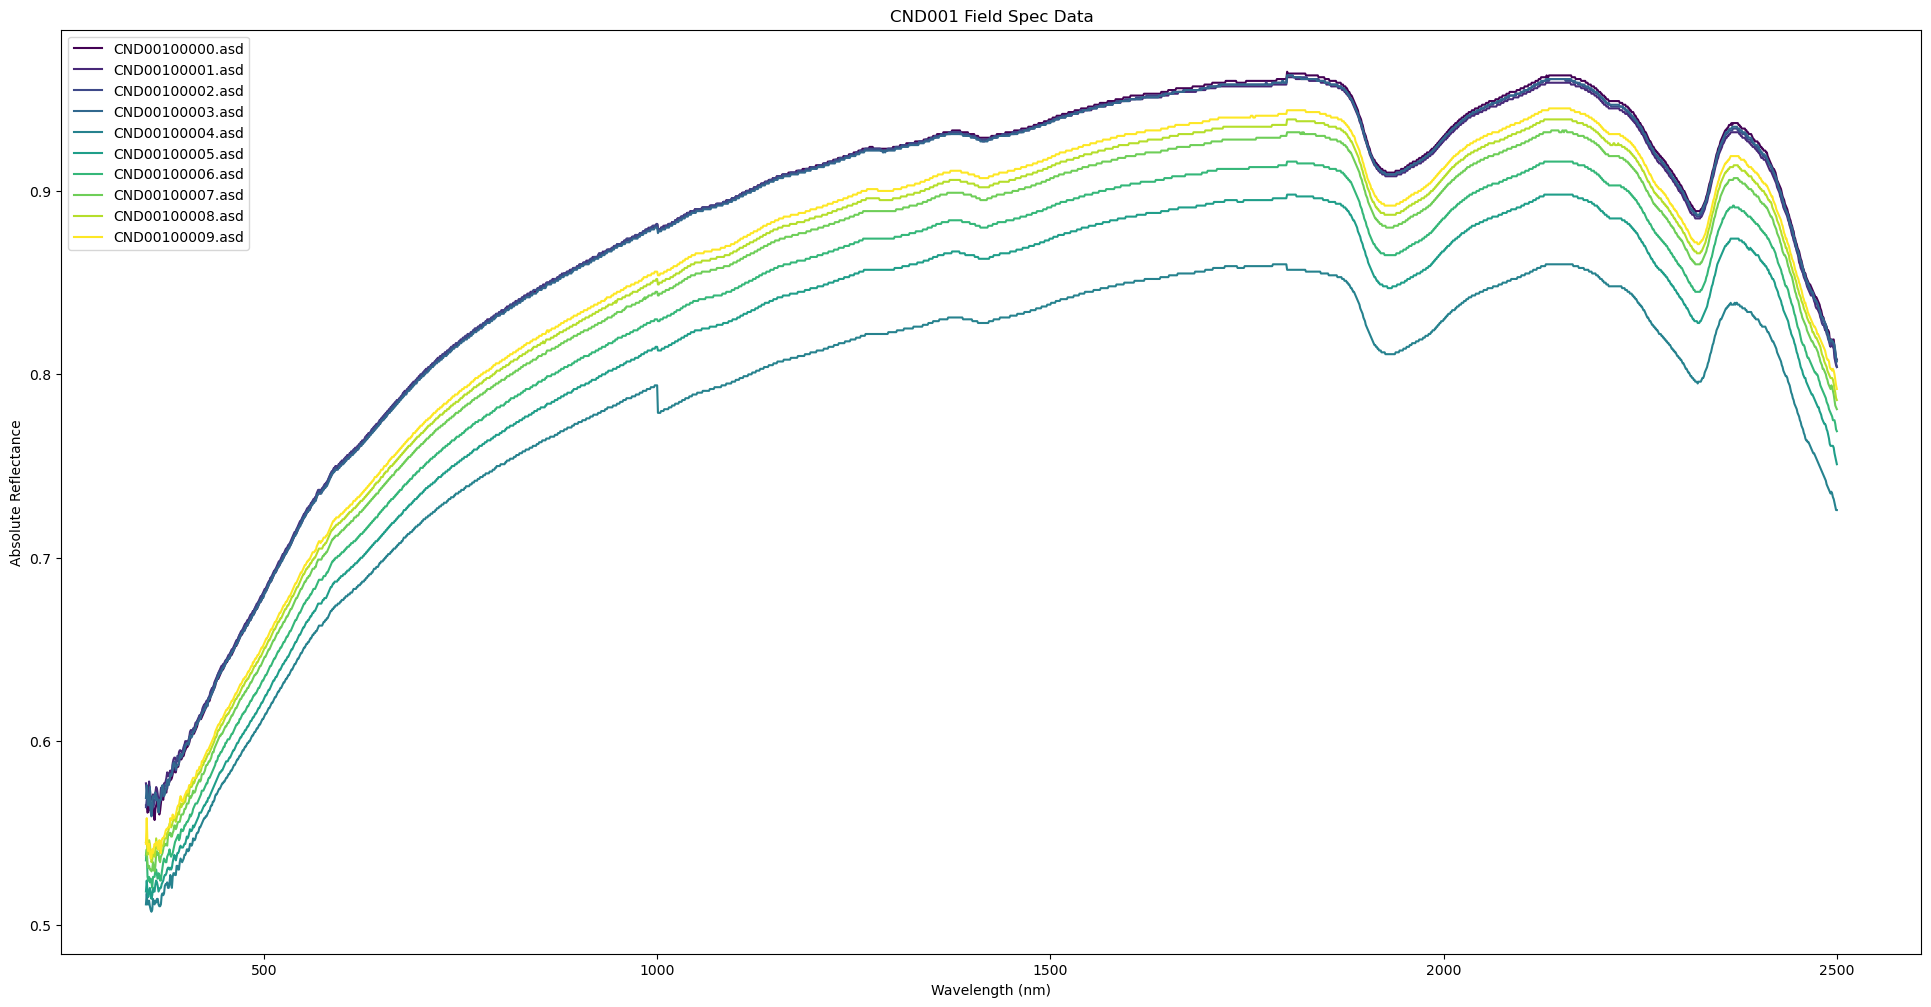

In [31]:
# Create a colormap with desired colors
num_colors = len(unique_values)
cmap = plt.cm.get_cmap('viridis', num_colors)  


fig, ax = plt.subplots(figsize=(24, 12))
for idx, value in enumerate(unique_values):
    subset = df[df.iloc[:, 0] == value]
    color = cmap(idx)  # Get color from the colormap
    ax.plot(subset.iloc[:, 2], subset.iloc[:, 3],'-', label=str(value), color=color)

# Add labels and title
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absolute Reflectance')
ax.set_title('CND001 Field Spec Data')

# Add legend with custom colors
handles, labels = ax.get_legend_handles_labels()
custom_legend = [(handle, label) for handle, label in zip(handles, labels)]
ax.legend(*zip(*custom_legend), loc='upper left')

# Show the plot
plt.show()

## Mean
The .mean() function in pandas calculates the arithmetic mean, which is the most common type of mean. The arithmetic mean is computed by summing up all the values in a dataset and then dividing by the total number of values.

Mathematically, the arithmetic mean (μ) is calculated as:

μ = (x₁ + x₂ + x₃ + ... + xₙ) / n

Where:

x₁, x₂, ..., xₙ are the individual values in the dataset.
n is the total number of values in the dataset.

'.groupby(2)': This groups the data in your DataFrame based on the values in column index 2 (presumably the wavelength column). This creates groups where data points with the same wavelength are grouped together.

[3]: This selects the column at index 3 (presumably the reflectance column) from each group.

.mean(): This calculates the mean value of the selected column within each group. So, for each unique wavelength, you're calculating the average reflectance value across all data points with that wavelength.



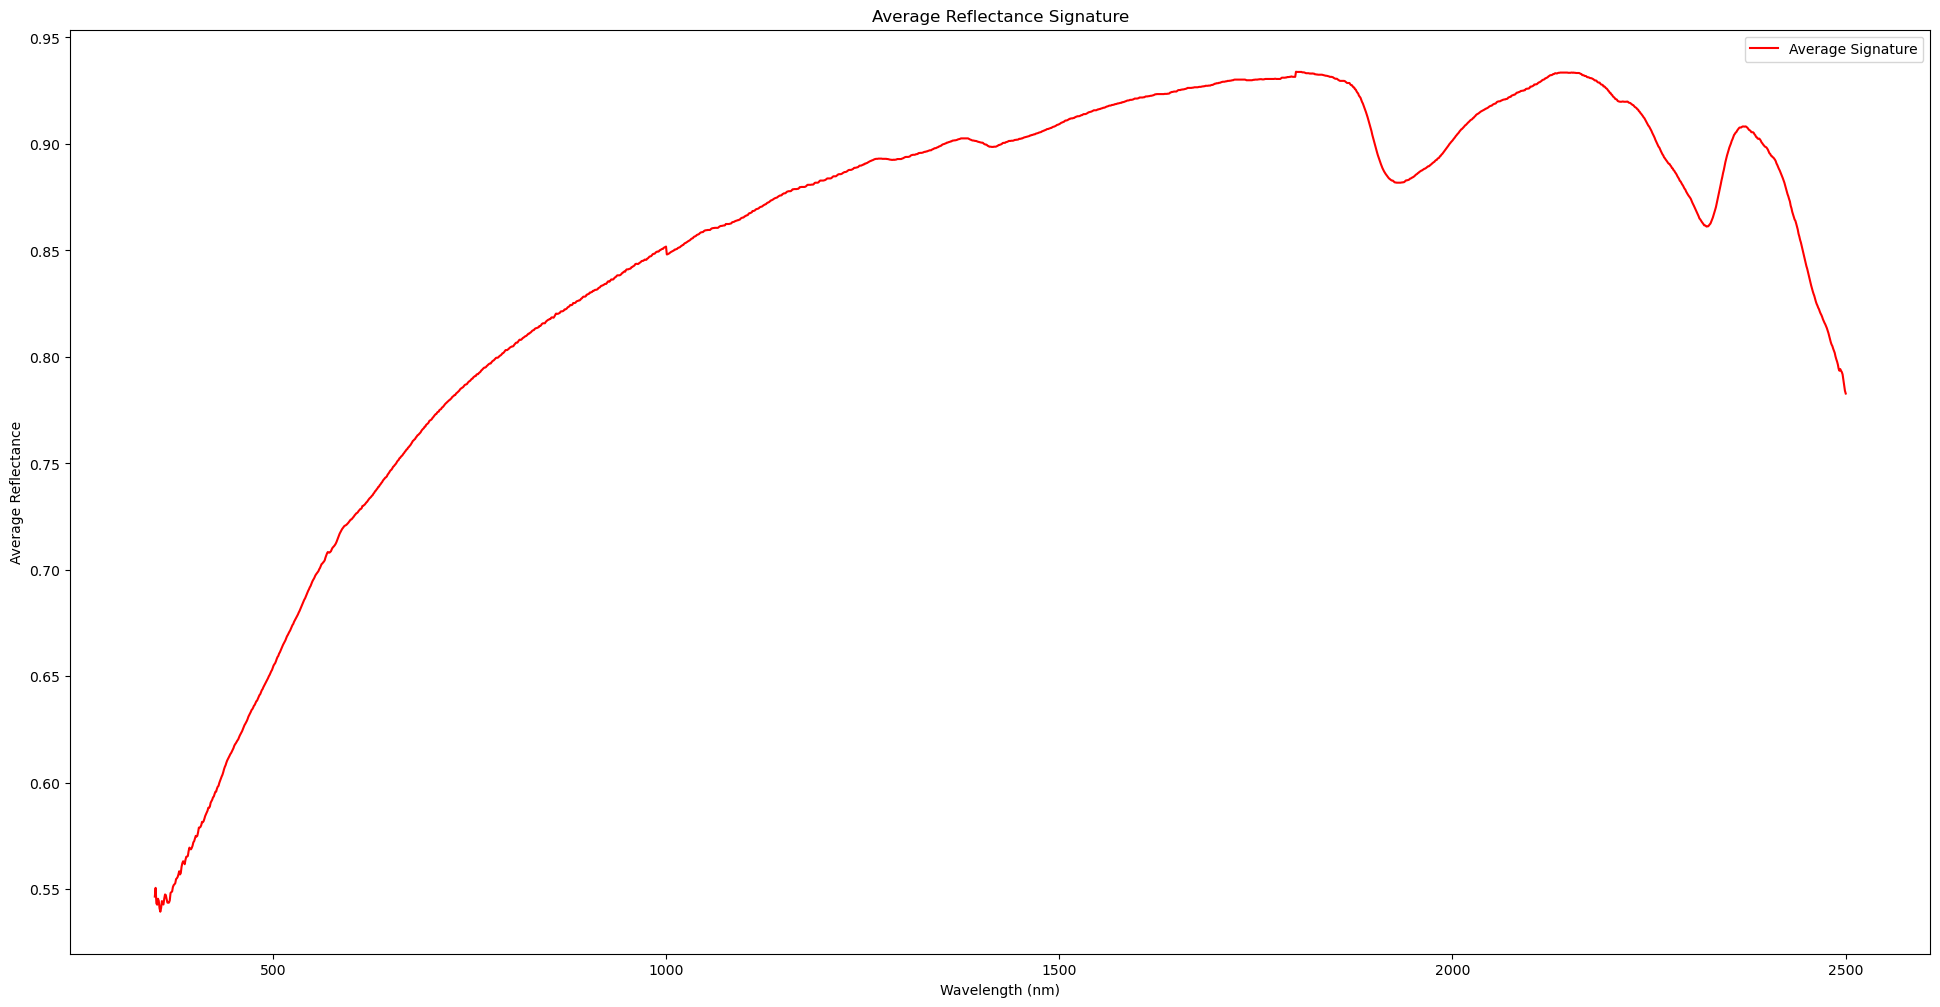

In [36]:
fig_avg, ax_avg = plt.subplots(figsize=(24, 12))  # Adjust width and height as needed

# Calculate the average signature
average_signature = df.groupby(2)[3].mean()  # Assuming column 2 is the wavelength and column 3 is the reflectance

# Plot the average signature
ax_avg.plot(average_signature.index, average_signature.values, 'r-', label='Average Signature') 

# Add labels and title
ax_avg.set_xlabel('Wavelength (nm)')
ax_avg.set_ylabel('Average Reflectance')
ax_avg.set_title('Average Reflectance Signature')

# Add legend
ax_avg.legend()

# Show both plots
plt.show()

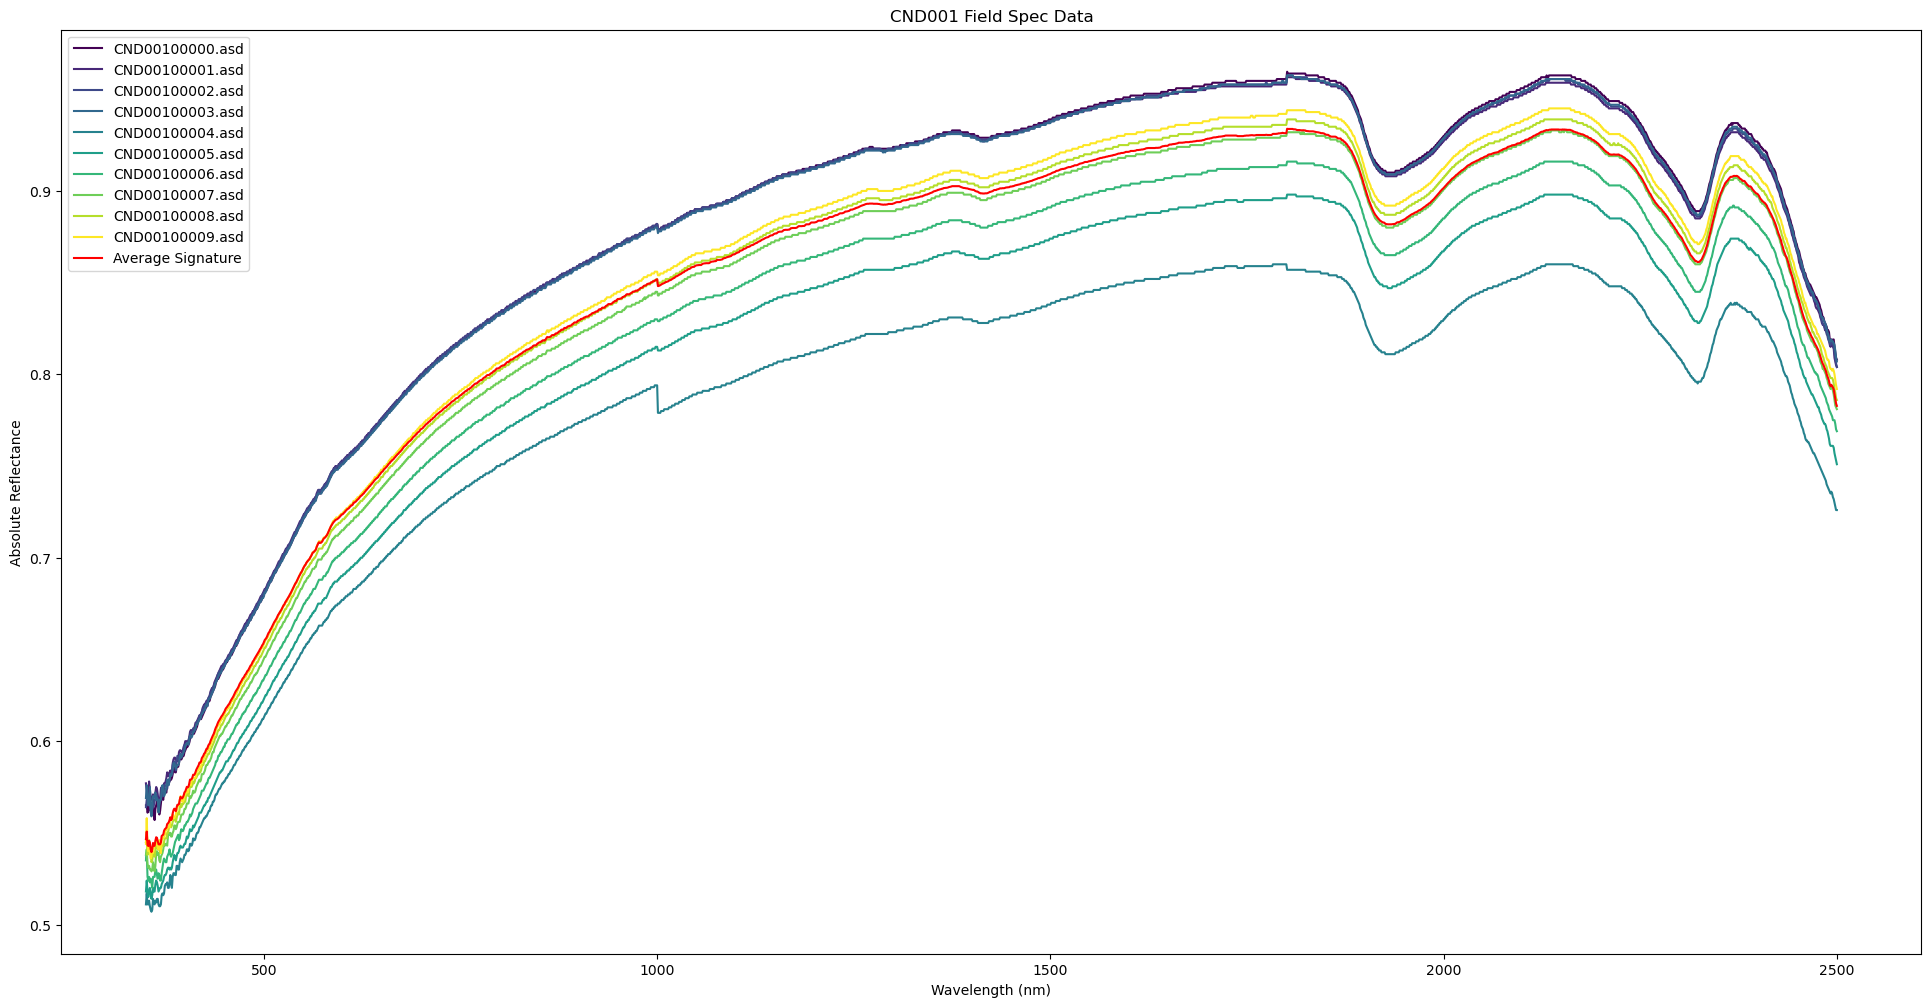

In [38]:
fig, ax = plt.subplots(figsize=(24, 12))
for idx, value in enumerate(unique_values):
    subset = df[df.iloc[:, 0] == value]
    color = cmap(idx)  # Get color from the colormap
    ax.plot(subset.iloc[:, 2], subset.iloc[:, 3],'-', label=str(value), color=color)
ax.plot(average_signature.index, average_signature.values, 'r-', label='Average Signature') 

# Add labels and title
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absolute Reflectance')
ax.set_title('CND001 Field Spec Data')

# Add legend with custom colors
handles, labels = ax.get_legend_handles_labels()
custom_legend = [(handle, label) for handle, label in zip(handles, labels)]
ax.legend(*zip(*custom_legend), loc='upper left')

# Show the plot
plt.show()

In [50]:
average_signature = df.groupby(2)[3].mean().reset_index()  # Reset index to convert groupby result to DataFrame

# Rename columns for clarity
average_signature.columns = ['Wavelength (nm)', 'Average Reflectance']

# Export the average signature to a CSV file
average_signature.to_csv(r'C:\Users\shlbs\OneDrive - The University of Texas at Austin\Desktop\Cornudas_Processed_FieldSpec\CND001\CND001_Average.csv', index=False)